In [1]:
import nltk
import pandas as pd

mobile = pd.read_csv('data/mobile2014.csv')
mobile.head()

,ID,Title,Author,ReviewID,Texts,YMD,Sentiment
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0


In [2]:
from nltk import sent_tokenize

print(sent_tokenize(mobile.Texts[0]))

['Phone does not work.', 'Does not allow outgoing text .', 'Incoming calls.', 'Would not disable South African settings.', 'Waste of money']


In [3]:
from nltk.tokenize import word_tokenize
 
word_tokenize(mobile.Texts[0])

['Phone',
 'does',
 'not',
 'work',
 '.',
 'Does',
 'not',
 'allow',
 'outgoing',
 'text',
 '.',
 'Incoming',
 'calls',
 '.',
 'Would',
 'not',
 'disable',
 'South',
 'African',
 'settings',
 '.',
 'Waste',
 'of',
 'money']

In [4]:
from nltk.tokenize import RegexpTokenizer

retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(mobile.Texts[0])

['Phone',
 'does',
 'not',
 'work',
 'Does',
 'not',
 'allow',
 'outgoing',
 'text',
 'Incoming',
 'calls',
 'Would',
 'not',
 'disable',
 'South',
 'African',
 'settings',
 'Waste',
 'of',
 'money']

In [5]:
mobile["tokenized_sents"] = mobile.apply(
    lambda row: nltk.word_tokenize(str(row["Texts"])), axis=1)
mobile['sents_length'] = mobile.apply(
    lambda row: len(row['tokenized_sents']), axis=1)
mobile.head()

,ID,Title,Author,ReviewID,Texts,YMD,Sentiment,tokenized_sents,sents_length
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0,"[Phone, does, not, work, ., Does, not, allow, ...",24
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0,"[I, am, not, satisfied, with, the, iPhone, 5s,...",63
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0,"[EATS, BATTERIES, ,, BRAND, NEW, BATTERIES, IT...",27
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0,"[I, 'm, wondering, if, this, phone, is, good, ...",38
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0,"[When, i, got, the, phone, it, had, a, virus, ...",21


- 어간 추출

In [6]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


- 표제어 추출

In [7]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

- 품사 추출

In [8]:
# part-of-speech
#NNP: 단수 고유명사
#VB: 동사
#VBP: 동사 현재형
#TO: to 전치사
#NN: 명사(단수형 혹은 집합형)
#DT: 관형사

nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [9]:
from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(mobile.Texts[0]))
tagged_list

[('Phone', 'NN'),
 ('does', 'VBZ'),
 ('not', 'RB'),
 ('work', 'VB'),
 ('.', '.'),
 ('Does', 'NNP'),
 ('not', 'RB'),
 ('allow', 'VB'),
 ('outgoing', 'VBG'),
 ('text', 'NN'),
 ('.', '.'),
 ('Incoming', 'VBG'),
 ('calls', 'NNS'),
 ('.', '.'),
 ('Would', 'MD'),
 ('not', 'RB'),
 ('disable', 'VB'),
 ('South', 'JJ'),
 ('African', 'JJ'),
 ('settings', 'NNS'),
 ('.', '.'),
 ('Waste', 'NN'),
 ('of', 'IN'),
 ('money', 'NN')]

In [10]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['Phone', 'text', 'Waste', 'money']

- 빈도 추출

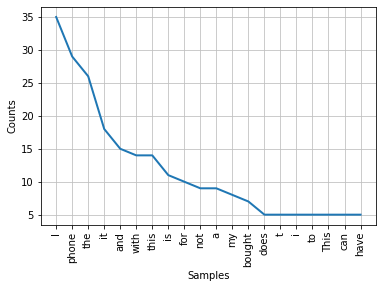

In [11]:
from nltk import Text

text = Text(retokenize.tokenize(str(mobile.Texts)))

import matplotlib.pyplot as plt 

text.plot(20)   # frequency plot
plt.show()

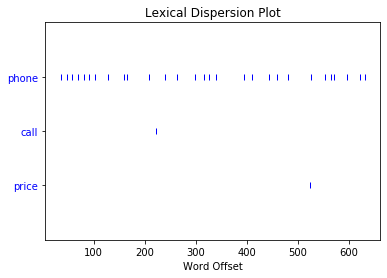

Displaying 25 of 32 matches:
0 Phone does not work Does not allow outgoin
S IT EATS FA 3 I m wondering if this phone is good or bad I j 4 When i got the 
 is good or bad I j 4 When i got the phone it had a virus on it with 5 Have the
it had a virus on it with 5 Have the phone with Verizon and Sprint Sprint 6 Spr
rint 6 Sprint would not activate the phone they said 7 The carma is very bad on
 said 7 The carma is very bad on the phone and it drop 8 I ve only had the phon
hone and it drop 8 I ve only had the phone for 2 months and now i 9 I bought th
r 2 months and now i 9 I bought this phone new and to date although 10 It never
le I enjoy everything else about the phone 12 This product is set with alot of 
 It is advertised as an unlocked GSM phone and 15 I hated the phone it horrible
nlocked GSM phone and 15 I hated the phone it horrible it cheap and ver 16 I fe
roblems with memory 19 I bought this phone last year for my daughter 20 Never w
phone it is not 22 I asked for a new phone and

In [12]:
text.dispersion_plot(["phone", "call", "price"])

text.concordance("phone")

In [13]:
from nltk import FreqDist

stopwords = ['I', 'i', 'this', 'the', 'a']
mobile_tokens = pos_tag(retokenize.tokenize(str(mobile.Texts)))

names_list = [t[0] for t in mobile_tokens if t[1] 
              == "NN" and t[0] not in stopwords]

fd_names = FreqDist(names_list)

fd_names.N(), fd_names["phone"], fd_names.freq("phone")

(97, 29, 0.29896907216494845)

In [14]:
fd_names.most_common(5)

[('phone', 29), ('everything', 4), ('Phone', 2), ('product', 2), ('cell', 2)]

- 워드 클라우드

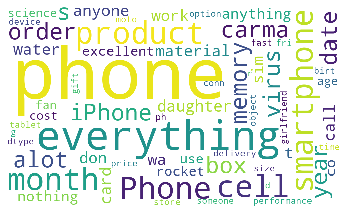

In [15]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

### 한글 텍스트 마이닝 

In [1]:
import konlpy
 
from konlpy.corpus import kolaw
kolaw.fileids()

c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


- 형태소 분석기 

In [3]:
from konlpy.tag import *

hannanum = Hannanum()
okt = Okt()

print("한나눔 : ", hannanum.nouns(c[:40]))
print("오픈 소스 한국어 분석기 : ", okt.nouns(c[:40]))

한나눔 :  ['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']
오픈 소스 한국어 분석기 :  ['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']


- 품사 파악

In [4]:
print("한나눔 : ", hannanum.pos(c[:40]))
print("오픈 소스 한국어 분석기 : ", okt.pos(c[:40]))
print(okt.tagset)

한나눔 :  [('대한민국헌법', 'N'), ('유구', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('역사', 'N'), ('와', 'J'), ('전통', 'N'), ('에', 'J'), ('빛', 'N'), ('나는', 'J'), ('우리', 'N'), ('대한국민', 'N'), ('은', 'J'), ('3·1운동', 'N'), ('으로', 'J')]
오픈 소스 한국어 분석기 :  [('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb'), ('우리', 'Noun'), ('대', 'Modifier'), ('한', 'Modifier'), ('국민', 'Noun'), ('은', 'Josa'), ('3', 'Number'), ('·', 'Punctuation'), ('1', 'Number'), ('운동', 'Noun'), ('으로', 'Josa')]
{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


- 단어 빈도 

In [ ]:
## 윈도우즈 - 한글 폰트 설정 - 맑은 
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [7]:
## Mac - 한글 폰트 설정 - AppleGothic
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

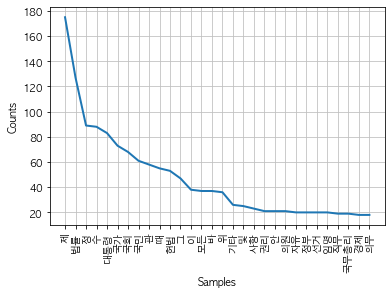

In [8]:
import matplotlib.pyplot as plt
from nltk import Text

kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

- 워드 클라우드

In [ ]:
# 윈도우즈 폰트 path 
path = 'c:/Windows/Fonts/malgun.ttf'

In [13]:
# Mac 폰트 path
path = '/Library/Fonts/AppleGothic.ttf'

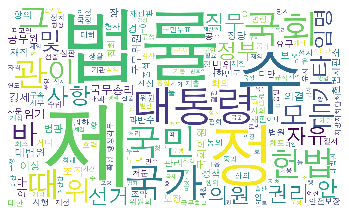

In [14]:
from wordcloud import WordCloud

wc = WordCloud(width = 1000, height = 600,
               background_color="white", font_path = path) 
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

### 단어 문서 매트릭스 

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

mobile = pd.read_csv('data/mobile2014.csv')

# NA 값이 들어 있는 문장에 ' ' (비어 있는) 문장을 입력 
mobile.Texts[mobile.Texts.isna()]
mobile.Texts = mobile.Texts.fillna('')

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range = (1,1),
    tokenizer = token.tokenize
)

text_counts= cv.fit_transform(mobile['Texts'])

In [17]:
text_counts

<2000x7623 sparse matrix of type '<class 'numpy.int64'>'
	with 56462 stored elements in Compressed Sparse Row format>

In [22]:
vocab = cv.get_feature_names()
vocab[:10]

['0', '00', '000', '0000000', '00pm', '01', '01usd', '02', '03', '06']

- 단어의 문서 전체 등장 횟수

In [23]:
import numpy as np
dist = np.sum(text_counts, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)

pd.DataFrame(dist, columns=vocab)

[[95 38  4 ...  3  4  1]] 0


,0,00,000,0000000,00pm,01,01usd,02,03,06,...,zillion,zip,zippy,zoes,zoey,zone,zoom,zooming,zte,zvc
0,95,38,4,6,4,6,1,2,1,1,...,1,2,3,1,1,6,4,3,4,1


- 단어 문서 매트릭스

In [27]:
pd.DataFrame(text_counts[:100].toarray(), columns=vocab).head()

,0,00,000,0000000,00pm,01,01usd,02,03,06,...,zillion,zip,zippy,zoes,zoey,zone,zoom,zooming,zte,zvc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- binary 단어 문서 매트릭스

In [73]:
cv_binary = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range = (1,1),
    binary = True,
    tokenizer = token.tokenize
)

text_counts= cv_binary.fit_transform(mobile['Texts'])

In [75]:
vocab = cv_binary.get_feature_names()

pd.DataFrame(text_counts[910:920].toarray(), columns=vocab)

,0,00,000,0000000,00pm,01,01usd,02,03,06,...,zillion,zip,zippy,zoes,zoey,zone,zoom,zooming,zte,zvc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- TF*IDF 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range = (1,1),
    tokenizer = token.tokenize
)

text_tfidf= tfidf.fit_transform(mobile['Texts'])

In [29]:
vocab = tfidf.get_feature_names()
vocab[:10]

['0', '00', '000', '0000000', '00pm', '01', '01usd', '02', '03', '06']

In [36]:
pd.DataFrame(text_tfidf[910:920].toarray(), columns=vocab)

,0,00,000,0000000,00pm,01,01usd,02,03,06,...,zillion,zip,zippy,zoes,zoey,zone,zoom,zooming,zte,zvc
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.133697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.133697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- n gram

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range = (1,2),
    tokenizer = token.tokenize
)

text_tfidf= tfidf.fit_transform(mobile['Texts'])

In [44]:
vocab = tfidf.get_feature_names()
vocab[:10]

['0',
 '0 0',
 '0 01',
 '0 100',
 '0 1080p',
 '0 115',
 '0 1in',
 '0 24',
 '0 30',
 '0 31']

In [45]:
pd.DataFrame(text_tfidf[910:920].toarray(), columns=vocab)

,0,0 0,0 01,0 100,0 1080p,0 115,0 1in,0 24,0 30,0 31,...,zooming,zooming photo,zooming photos,zte,zte illustra,zte os,zte phone,zte valet,zvc,zvc update
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.078505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.078505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 연습문제 

### 감성 분석 - Multinomial NB

In [55]:
import nltk
import pandas as pd

mobile = pd.read_csv('data/mobile2014.csv')
mobile.head()

,ID,Title,Author,ReviewID,Texts,YMD,Sentiment
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0


In [56]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
ID           2000 non-null int64
Title        2000 non-null object
Author       2000 non-null object
ReviewID     2000 non-null object
Texts        1999 non-null object
YMD          2000 non-null object
Sentiment    2000 non-null int64
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [57]:
mobile.Sentiment.value_counts()

1    1000
0    1000
Name: Sentiment, dtype: int64

In [58]:
# NA 값이 들어 있는 문장에 ' ' (비어 있는) 문장을 입력 
mobile.Texts[mobile.Texts.isna()]
mobile.Texts = mobile.Texts.fillna('')

In [59]:
mobile.Sentiment = pd.Categorical(mobile.Sentiment)
Sentiment_count = mobile.groupby('Sentiment').count()
Sentiment_count

,ID,Title,Author,ReviewID,Texts,YMD
Sentiment,,,,,,
0,1000,1000,1000,1000,1000,1000
1,1000,1000,1000,1000,1000,1000


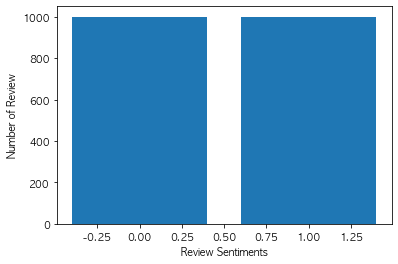

In [60]:
import matplotlib.pyplot as plt

plt.bar(Sentiment_count.index.values, Sentiment_count['ID'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

- 빈도 기반 단어 문서 매트릭스 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range = (1,1),
    tokenizer = token.tokenize
)

text_counts= cv.fit_transform(mobile['Texts'])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, mobile['Sentiment'], test_size=0.3)

- Multinomial NB 

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.91


In [63]:
from sklearn.model_selection import cross_val_score 

score = cross_val_score(clf, text_counts, mobile['Sentiment'], scoring='accuracy', cv=5)
print("MultinomialNB 5 CV Accuracy:", score.mean())

MultinomialNB 5 CV Accuracy: 0.899


- tf idf 기반 단어 문서 매트릭스

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range = (1,1),
    tokenizer = token.tokenize
)

text_tf= tf.fit_transform(mobile['Texts'])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, mobile['Sentiment'], test_size=0.3)

In [67]:
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9


In [68]:
score = cross_val_score(clf, text_tf, mobile['Sentiment'], scoring='accuracy', cv=5)
print("MultinomialNB 5 CV Accuracy:", score.mean())

MultinomialNB 5 CV Accuracy: 0.9145


- tf idf with bigram

In [69]:
tf=TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range = (1,2),
    tokenizer = token.tokenize
)

text_tf= tf.fit_transform(mobile['Texts'])

X_train, X_test, y_train, y_test = train_test_split(
    text_tf, mobile['Sentiment'], test_size=0.3)

clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9133333333333333


In [71]:
score = cross_val_score(clf, text_tf, mobile['Sentiment'], scoring='accuracy', cv=5)
print("MultinomialNB 5 CV Accuracy:", score.mean())

MultinomialNB 5 CV Accuracy: 0.9135


- Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

predicted= logreg.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.8966666666666666


In [72]:
score = cross_val_score(logreg, text_tf, mobile['Sentiment'], scoring='accuracy', cv=5)
print("LogisticRegression 5 CV Accuracy:", score.mean())

LogisticRegression 5 CV Accuracy: 0.898


- Bernoulli NB

In [76]:
cv_binary = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range = (1,1),
    binary = True,
    tokenizer = token.tokenize
)

text_counts= cv_binary.fit_transform(mobile['Texts'])

In [77]:
from sklearn.naive_bayes import BernoulliNB

X_train, X_test, y_train, y_test = train_test_split(
    text_tf, mobile['Sentiment'], test_size=0.3)

clf = BernoulliNB().fit(X_train, y_train)

predicted= clf.predict(X_test)
print("BernoulliNB Accuracy:",metrics.accuracy_score(y_test, predicted))

BernoulliNB Accuracy: 0.8666666666666667


In [78]:
score = cross_val_score(clf, text_counts, mobile['Sentiment'], scoring='accuracy', cv=5)
print("BernoulliNB 5 CV Accuracy:", score.mean())

BernoulliNB 5 CV Accuracy: 0.8265
